In [165]:
import numpy as np
from scipy import linalg
from scipy import sparse
from scipy.sparse import dia_matrix
import matplotlib.pyplot as plt
from numba import jit
import time

[0.0625 0.125  0.0625 0.125  0.375  0.125  0.0625 0.125  0.0625]
[[ 4. -1.  0. -1.  0.  0.  0.  0.  0.]
 [-1.  4. -1.  0. -1.  0.  0.  0.  0.]
 [ 0. -1.  4.  0.  0. -1.  0.  0.  0.]
 [-1.  0.  0.  4. -1.  0. -1.  0.  0.]
 [ 0. -1.  0. -1.  4. -1.  0. -1.  0.]
 [ 0.  0. -1.  0. -1.  4.  0.  0. -1.]
 [ 0.  0.  0. -1.  0.  0.  4. -1.  0.]
 [ 0.  0.  0.  0. -1.  0. -1.  4. -1.]
 [ 0.  0.  0.  0.  0. -1.  0. -1.  4.]]


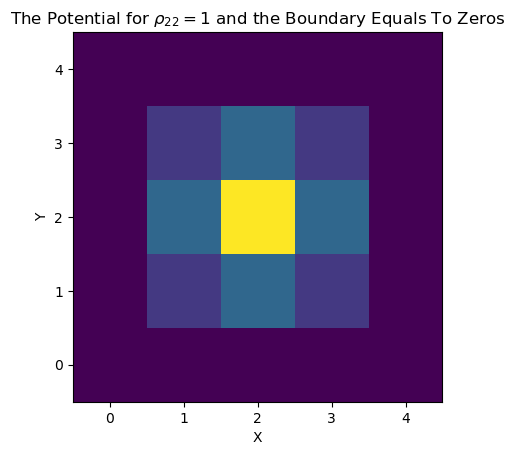

In [16]:
def A_generate(N):
    #A = np.zeros((N**2,N**2))
    ex = np.ones(N**2)
    ex2 = np.ones(N**2)
    ex3 = np.ones(N**2)
    for i in range(N**2):
        if i%N == 0 and i!=0:
            ex2[i] =0
        elif i%N == N-1:
            ex3[i] = 0
    data = np.array([-ex, -ex3, 4*ex, -ex2, -ex])
    offsets = np.array([-N,-1,0,1,N])
    A = dia_matrix((data,offsets), shape = (N**2,N**2)).toarray()
    return A

def b_generate(N):
    b = np.zeros(N**2)
    b[4] = 1
    return b

N = 3

A = A_generate(N)
b = b_generate(N)

x = linalg.solve(A, b)
print(x)
x = x.reshape(N,N)
X = np.zeros((N+2,N+2))
X[1:-1,1:-1]=x
print(A)
plt.imshow(X, origin='lower')
plt.title(r'The Potential for $\rho_{22}=1$ and the Boundary Equals To Zeros')
plt.xlabel('X')
plt.ylabel('Y')
plt.savefig('P1.png')

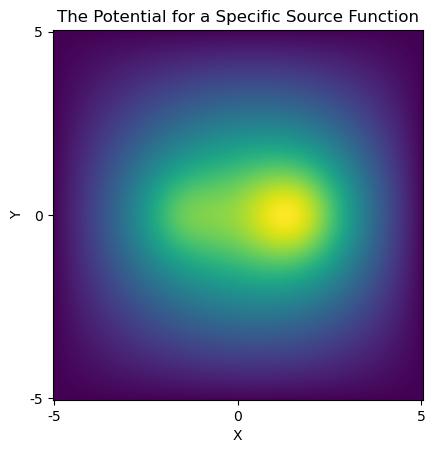

In [103]:
def A_generate(N):
    #A = np.zeros((N**2,N**2))
    ex = np.ones(N**2)
    ex2 = np.ones(N**2)
    ex3 = np.ones(N**2)
    for i in range(N**2):
        if i%N == 0 and i!=0:
            ex2[i] =0
        elif i%N == N-1:
            ex3[i] = 0
    data = np.array([-ex, -ex3, 4*ex, -ex2, -ex])
    offsets = np.array([-N,-1,0,1,N])
    A = dia_matrix((data,offsets), shape = (N**2,N**2)).toarray()
    return A

def b_generate(N, x0=-5, x1=5, y0=-5, y1=5):
    b = np.zeros((N,N))
    dx = (x1 - x0)/(N+1)
    for i in range(N):
        for j in range(N):
            b[j,i] = dx**2*g(y0+(j+1)*dx,x0+(i+1)*dx)
    return b.reshape(N**2)

def g(x,y):
    
    r1 = np.sqrt((x+1.5)**2+y**2)
    r2 = np.sqrt((x-1.5)**2+y**2)
    G = np.exp(-1.25*r1**2)+1.5*np.exp(-r2**2)
    
    return G 

N = 129

A = A_generate(N)
b = b_generate(N)

x = linalg.solve(A, b)
V_analytical = x.reshape(N,N)

plt.imshow(V_analytical.T, origin='lower')
plt.title(r'The Potential for a Specific Source Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks([0,64,128],[-5,0,5])
plt.yticks([0,64,128],[-5,0,5])
plt.savefig('P2_Potential.png')

[[6.00016491e-21 1.58112239e-20 4.10337285e-20 ... 4.10337285e-20
  1.58112239e-20 6.00016491e-21]
 [1.17958917e-20 3.10837264e-20 8.06693524e-20 ... 8.06693524e-20
  3.10837264e-20 1.17958917e-20]
 [2.28387094e-20 6.01830038e-20 1.56188607e-19 ... 1.56188607e-19
  6.01830038e-20 2.28387094e-20]
 ...
 [2.90421327e-16 6.30478594e-16 1.35210600e-15 ... 1.35210600e-15
  6.30478594e-16 2.90421327e-16]
 [1.71189010e-16 3.71635952e-16 7.96999621e-16 ... 7.96999621e-16
  3.71635952e-16 1.71189010e-16]
 [9.96831626e-17 2.16403185e-16 4.64091959e-16 ... 4.64091959e-16
  2.16403185e-16 9.96831626e-17]]


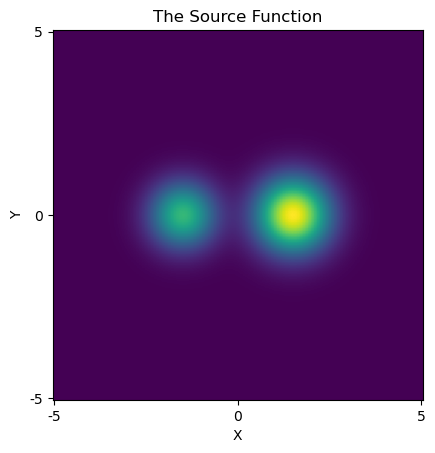

In [113]:
def g(x,y):
    
    r1 = np.sqrt((x+1.5)**2+y**2)
    r2 = np.sqrt((x-1.5)**2+y**2)
    G = np.exp(-1.25*r1**2)+1.5*np.exp(-r2**2)
    
    return G

N = 129

X = np.linspace(-5,5,N)
Y = np.linspace(-5,5,N)

XX,YY = np.meshgrid(X,Y,indexing='ij')

U = g(XX,YY)

plt.imshow(U.T, origin='lower')
plt.title('The Source Function')
plt.xlabel('X')
plt.ylabel('Y')
plt.xticks([0,64,128],[-5,0,5])
plt.yticks([0,64,128],[-5,0,5])
plt.savefig('P2_Source.png')

Calculation time for Jacobi method: 0.9180495738983154
Calculation time for Gauss-Seidel method: 0.7209992408752441
Calculation time for SOR method with w=1.2: 0.6639995574951172
Calculation time for SOR method with w=1.5: 0.3099994659423828
Calculation time for SOR method with w=1.8: 0.12599968910217285
Calculation time for SOR method with w=2: 1.6138458251953125


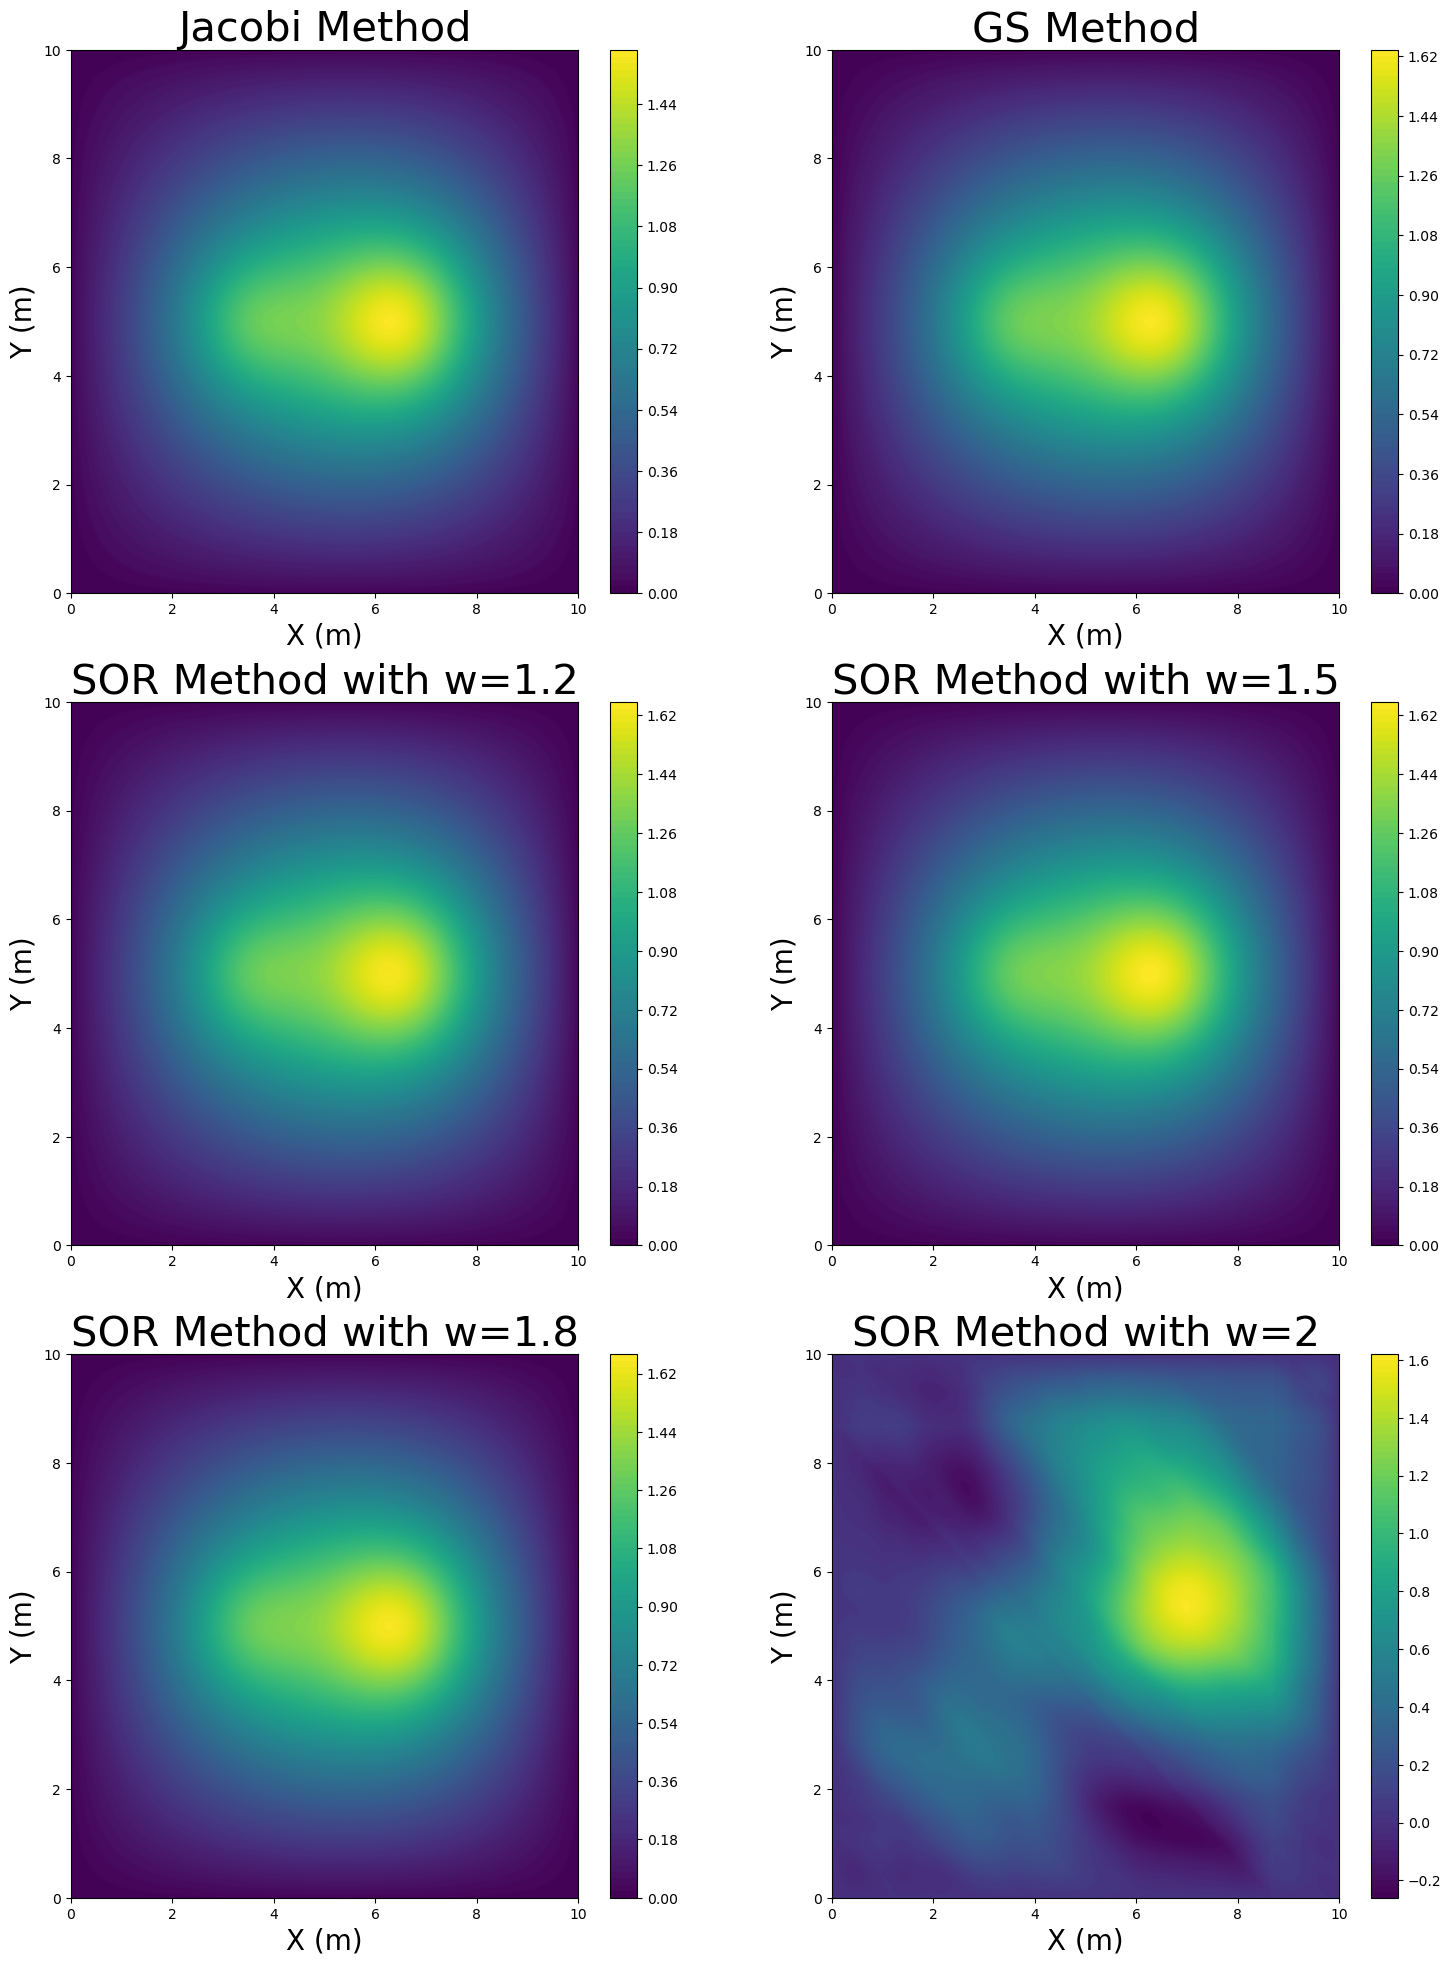

In [161]:
import numpy as np
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (18,24), ncols = 2, nrows = 3)

def g(x,y):
    
    r1 = np.sqrt((x+1.5)**2+y**2)
    r2 = np.sqrt((x-1.5)**2+y**2)
    G = np.exp(-1.25*r1**2)+1.5*np.exp(-r2**2)
    
    return G



@jit
def I1(Vi, Vf, N, x0=-5, x1=5, y0=-5, y1=5):
    dx = (x1 - x0)/(N+1)
    for i in range(N):
        for j in range(N):
            if i != 0 and i != N-1 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,j+1] + dx**2*U[i,j])
            elif i == 0 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vi[N-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,j+1] + dx**2*U[i,j])
            elif j == 0 and i != 0 and i != N-1:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,N-1] + Vi[i,j+1] + dx**2*U[i,j])
            elif i == N-1 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[0,j] + Vi[i,j-1] + Vi[i,j+1] + dx**2*U[i,j])
            elif j == N-1 and i != 0 and i != N-1:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,0] + dx**2*U[i,j])
            elif i == 0 and j == 0:
                Vf[i,j] = 0.25 * (Vi[N-1,j] + Vi[i+1,j] + Vi[i,N-1] + Vi[i,j+1] + dx**2*U[i,j])
            elif i == 0 and j == N-1:
                Vf[i,j] = 0.25 * (Vi[N-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,0] + dx**2*U[i,j])
            elif i == N-1 and j == 0:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[0,j] + Vi[i,N-1] + Vi[i,j+1] + dx**2*U[i,j])
            elif i == N-1 and j == N-1:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[0,j] + Vi[i,j-1] + Vi[i,0] + dx**2*U[i,j])
    return Vf

@jit
def I1_Fix(Vi, Vf, N, x0=-5, x1=5, y0=-5, y1=5):
    dx = (x1 - x0)/(N+1)
    for i in range(N):
        for j in range(N):
            if i != 0 and i != N-1 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,j+1] + dx**2*U[i,j])
    return Vf

@jit
def I2(Vi, Vf, N, x0=-5, x1=5, y0=-5, y1=5):
    dx = (x1 - x0)/(N+1)
    for i in range(N):
        for j in range(N):
            if i != 0 and i != N-1 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
            elif i == 0 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vf[N-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
            elif j == 0 and i != 0 and i != N-1:
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,N-1] + Vf[i,j+1] + dx**2*U[i,j])
            elif i == N-1 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vf[0,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
            elif j == N-1 and i != 0 and i != N-1:
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,0] + dx**2*U[i,j])
            elif i == 0 and j == 0:
                Vf[i,j] = 0.25 * (Vf[N-1,j] + Vf[i+1,j] + Vf[i,N-1] + Vf[i,j+1] + dx**2*U[i,j])
            elif i == 0 and j == N-1:
                Vf[i,j] = 0.25 * (Vf[N-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,0] + dx**2*U[i,j])
            elif i == N-1 and j == 0:
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vf[0,j] + Vf[i,N-1] + Vf[i,j+1] + dx**2*U[i,j])
            elif i == N-1 and j == N-1:
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vf[0,j] + Vf[i,j-1] + Vf[i,0] + dx**2*U[i,j])
    return Vf

@jit
def I2_Fix(Vi, Vf, N, x0=-5, x1=5, y0=-5, y1=5):
    dx = (x1 - x0)/(N+1)
    for i in range(N):
        for j in range(N):
            if i != 0 and i != N-1 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
    return Vf

@jit
def I3(Vi, Vf, N, w, x0=-5, x1=5, y0=-5, y1=5):
    dx = (x1 - x0)/(N+1)
    v  = 1-w
    for i in range(N):
        for j in range(N):
            if (i+j)%2 == 0:
                
                if i != 0 and i != N-1 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,j+1] + dx**2*U[i,j])
                elif i == 0 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[N-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,j+1] + dx**2*U[i,j])
                elif j == 0 and i != 0 and i != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,N-1] + Vi[i,j+1] + dx**2*U[i,j])
                elif i == N-1 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[i-1,j] + Vi[0,j] + Vi[i,j-1] + Vi[i,j+1] + dx**2*U[i,j])
                elif j == N-1 and i != 0 and i != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,0] + dx**2*U[i,j])
                elif i == 0 and j == 0:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[N-1,j] + Vi[i+1,j] + Vi[i,N-1] + Vi[i,j+1] + dx**2*U[i,j])
                elif i == 0 and j == N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[N-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,0] + dx**2*U[i,j])
                elif i == N-1 and j == 0:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[i-1,j] + Vi[0,j] + Vi[i,N-1] + Vi[i,j+1] + dx**2*U[i,j])
                elif i == N-1 and j == N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[i-1,j] + Vi[0,j] + Vi[i,j-1] + Vi[i,0] + dx**2*U[i,j])
            
            else:
                
                if i != 0 and i != N-1 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
                elif i == 0 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[N-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
                elif j == 0 and i != 0 and i != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,N-1] + Vf[i,j+1] + dx**2*U[i,j])
                elif i == N-1 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[0,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
                elif j == N-1 and i != 0 and i != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,0] + dx**2*U[i,j])
                elif i == 0 and j == 0:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[N-1,j] + Vf[i+1,j] + Vf[i,N-1] + Vf[i,j+1] + dx**2*U[i,j])
                elif i == 0 and j == N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[N-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,0] + dx**2*U[i,j])
                elif i == N-1 and j == 0:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[0,j] + Vf[i,N-1] + Vf[i,j+1] + dx**2*U[i,j])
                elif i == N-1 and j == N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[0,j] + Vf[i,j-1] + Vf[i,0] + dx**2*U[i,j])
                    
    return Vf

@jit
def I3_Fix(Vi, Vf, N, w, x0=-5, x1=5, y0=-5, y1=5):
    dx = (x1 - x0)/(N+1)
    v  = 1-w
    for i in range(N):
        for j in range(N):
            if (i+j)%2 == 0:
                
                if i != 0 and i != N-1 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
            else:
                
                if i != 0 and i != N-1 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
    return Vf

num = 2**7+1

X = np.linspace(-5,5,num)
Y = np.linspace(-5,5,num)

XX,YY = np.meshgrid(X,Y,indexing='ij')

U = g(XX,YY)

x = np.linspace(0,10,num)
y = np.linspace(0,10,num)
X, Y = np.meshgrid(x,y)

V1 = V_analytical.copy()
V1[1:num-1,1:num-1] = 0
V2 = V1.copy()
V3 = V1.copy()
V4 = V1.copy()
V5 = V1.copy()
V6 = V1.copy()

error_1 = []
error_2 = []
error_3 = []
error_4 = []
error_5 = []
error_6 = []

tolerance = 1e-7
N_max = 10000

error = 1
count = 0

s = time.time()
while error > tolerance:
    count += 1
    V1_old = V1.copy()
    V1 = I1_Fix(V1_old, V1, num)
    error = np.sqrt(np.sum((V1 - V1_old)**2))/num**2
    error_1.append(error)
    if count > N_max:
        break
e = time.time()

print('Calculation time for Jacobi method:', e-s)

error = 1
count = 0

s = time.time()
while error > tolerance:
    count += 1
    V2_old = V2.copy()
    V2 = I2_Fix(V2_old, V2, num)
    error = np.sqrt(np.sum((V2 - V2_old)**2))/num**2
    error_2.append(error)
    if count > N_max:
        break
e = time.time()

print('Calculation time for Gauss-Seidel method:', e-s)

error = 1
count = 0

w = 1.2

s = time.time()
while error > tolerance:
    count += 1
    V3_old = V3.copy()
    V3 = I3_Fix(V3_old, V3, num, w)
    error = np.sqrt(np.sum((V3 - V3_old)**2))/num**2
    error_3.append(error)
    if count > N_max:
        break
e = time.time()

print('Calculation time for SOR method with w=1.2:', e-s)

error = 1
count = 0

w = 1.5

s = time.time()
while error > tolerance:
    count += 1
    V4_old = V4.copy()
    V4 = I3_Fix(V4_old, V4, num, w)
    error = np.sqrt(np.sum((V4 - V4_old)**2))/num**2
    error_4.append(error)
    if count > N_max:
        break
e = time.time()

print('Calculation time for SOR method with w=1.5:', e-s)

error = 1
count = 0

w = 1.8

s = time.time()
while error > tolerance:
    count += 1
    V5_old = V5.copy()
    V5 = I3_Fix(V5_old, V5, num, w)
    error = np.sqrt(np.sum((V5 - V5_old)**2))/num**2
    error_5.append(error)
    if count > N_max:
        break
e = time.time()

print('Calculation time for SOR method with w=1.8:', e-s)

error = 1
count = 0

w = 2

s = time.time()
while error > tolerance:
    count += 1
    V6_old = V6.copy()
    V6 = I3_Fix(V6_old, V6, num, w)
    error = np.sqrt(np.sum((V6 - V6_old)**2))/num**2
    error_6.append(error)
    if count > N_max:
        break
e = time.time()

print('Calculation time for SOR method with w=2:', e-s)

cs1 = ax[0,0].contour(X, Y, V1.T, levels = 100)
cs1 = ax[0,0].contourf(X, Y, V1.T, levels = 100)

cs2 = ax[0,1].contour(X, Y, V2.T, levels = 100)
cs2 = ax[0,1].contourf(X, Y, V2.T, levels = 100)

cs3 = ax[1,0].contour(X, Y, V3.T, levels = 100)
cs3 = ax[1,0].contourf(X, Y, V3.T, levels = 100)

cs4 = ax[1,1].contour(X, Y, V4.T, levels = 100)
cs4 = ax[1,1].contourf(X, Y, V4.T, levels = 100)

cs5 = ax[2,0].contour(X, Y, V5.T, levels = 100)
cs5 = ax[2,0].contourf(X, Y, V5.T, levels = 100)

cs6 = ax[2,1].contour(X, Y, V6.T, levels = 100)
cs6 = ax[2,1].contourf(X, Y, V6.T, levels = 100)

fig.colorbar(cs1,ax=ax[0,0])
fig.colorbar(cs2,ax=ax[0,1]);
fig.colorbar(cs3,ax=ax[1,0]);
fig.colorbar(cs4,ax=ax[1,1]);
fig.colorbar(cs5,ax=ax[2,0]);
fig.colorbar(cs6,ax=ax[2,1]);

ax[0,0].set_xlabel('X (m)', fontsize = 20)
ax[0,0].set_ylabel('Y (m)', fontsize = 20)
ax[0,0].set_title('Jacobi Method',fontsize = 30)

ax[0,1].set_xlabel('X (m)', fontsize = 20)
ax[0,1].set_ylabel('Y (m)', fontsize = 20)
ax[0,1].set_title('GS Method', fontsize = 30);

ax[1,0].set_xlabel('X (m)', fontsize = 20)
ax[1,0].set_ylabel('Y (m)', fontsize = 20)
ax[1,0].set_title('SOR Method with w=1.2', fontsize = 30);

ax[1,1].set_xlabel('X (m)', fontsize = 20)
ax[1,1].set_ylabel('Y (m)', fontsize = 20)
ax[1,1].set_title('SOR Method with w=1.5', fontsize = 30);

ax[2,0].set_xlabel('X (m)', fontsize = 20)
ax[2,0].set_ylabel('Y (m)', fontsize = 20)
ax[2,0].set_title('SOR Method with w=1.8', fontsize = 30);

ax[2,1].set_xlabel('X (m)', fontsize = 20)
ax[2,1].set_ylabel('Y (m)', fontsize = 20)
ax[2,1].set_title('SOR Method with w=2', fontsize = 30);

plt.savefig('P3_Solution.png')

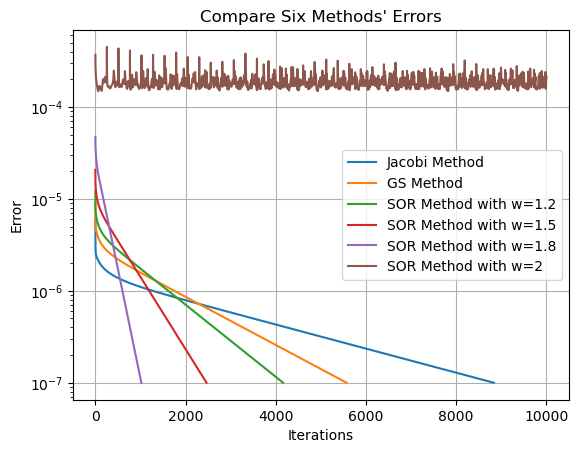

In [163]:
plt.plot(error_1, label='Jacobi Method')
plt.plot(error_2, label='GS Method')
plt.plot(error_3, label='SOR Method with w=1.2')
plt.plot(error_4, label='SOR Method with w=1.5')
plt.plot(error_5, label='SOR Method with w=1.8')
plt.plot(error_6, label='SOR Method with w=2')

plt.yscale('log')
plt.legend()
plt.grid()
plt.title('Compare Six Methods\' Errors')
plt.xlabel('Iterations')
plt.ylabel('Error');

plt.savefig('P3_Error.png')

In [174]:
def A_generate(N):
    #A = np.zeros((N**2,N**2))
    ex = np.ones(N**2)
    ex2 = np.ones(N**2)
    ex3 = np.ones(N**2)
    for i in range(N**2):
        if i%N == 0 and i!=0:
            ex2[i] =0
        elif i%N == N-1:
            ex3[i] = 0
    data = np.array([-ex, -ex3, 4*ex, -ex2, -ex])
    offsets = np.array([-N,-1,0,1,N])
    A = dia_matrix((data,offsets), shape = (N**2,N**2)).toarray()
    return A

def b_generate(N, x0=-5, x1=5, y0=-5, y1=5):
    b = np.zeros((N,N))
    dx = (x1 - x0)/(N+1)
    for i in range(N):
        for j in range(N):
            b[j,i] = dx**2*g(y0+(j+1)*dx,x0+(i+1)*dx)
    return b.reshape(N**2)

def g(x,y):
    
    r1 = np.sqrt((x+1.5)**2+y**2)
    r2 = np.sqrt((x-1.5)**2+y**2)
    G = np.exp(-1.25*r1**2)+1.5*np.exp(-r2**2)
    
    return G 

N = 128

A = A_generate(N)
b = b_generate(N)

s = time.time()
x = sparse.linalg.spsolve(A, b)
e = time.time()
print(e-s)
V_analytical = x.reshape(N,N)


1.2195794582366943


C:\Users\alan\anaconda3\lib\site-packages\scipy\sparse\linalg\_dsolve\linsolve.py:168: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  warn('spsolve requires A be CSC or CSR matrix format',


In [175]:
import numpy as np
import matplotlib.pyplot as plt

def g(x,y):
    
    r1 = np.sqrt((x+1.5)**2+y**2)
    r2 = np.sqrt((x-1.5)**2+y**2)
    G = np.exp(-1.25*r1**2)+1.5*np.exp(-r2**2)
    
    return G



@jit
def I1(Vi, Vf, N, x0=-5, x1=5, y0=-5, y1=5):
    dx = (x1 - x0)/(N+1)
    for i in range(N):
        for j in range(N):
            if i != 0 and i != N-1 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,j+1] + dx**2*U[i,j])
            elif i == 0 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vi[N-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,j+1] + dx**2*U[i,j])
            elif j == 0 and i != 0 and i != N-1:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,N-1] + Vi[i,j+1] + dx**2*U[i,j])
            elif i == N-1 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[0,j] + Vi[i,j-1] + Vi[i,j+1] + dx**2*U[i,j])
            elif j == N-1 and i != 0 and i != N-1:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,0] + dx**2*U[i,j])
            elif i == 0 and j == 0:
                Vf[i,j] = 0.25 * (Vi[N-1,j] + Vi[i+1,j] + Vi[i,N-1] + Vi[i,j+1] + dx**2*U[i,j])
            elif i == 0 and j == N-1:
                Vf[i,j] = 0.25 * (Vi[N-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,0] + dx**2*U[i,j])
            elif i == N-1 and j == 0:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[0,j] + Vi[i,N-1] + Vi[i,j+1] + dx**2*U[i,j])
            elif i == N-1 and j == N-1:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[0,j] + Vi[i,j-1] + Vi[i,0] + dx**2*U[i,j])
    return Vf

@jit
def I1_Fix(Vi, Vf, N, x0=-5, x1=5, y0=-5, y1=5):
    dx = (x1 - x0)/(N+1)
    for i in range(N):
        for j in range(N):
            if i != 0 and i != N-1 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,j+1] + dx**2*U[i,j])
    return Vf

@jit
def I2(Vi, Vf, N, x0=-5, x1=5, y0=-5, y1=5):
    dx = (x1 - x0)/(N+1)
    for i in range(N):
        for j in range(N):
            if i != 0 and i != N-1 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
            elif i == 0 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vf[N-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
            elif j == 0 and i != 0 and i != N-1:
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,N-1] + Vf[i,j+1] + dx**2*U[i,j])
            elif i == N-1 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vf[0,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
            elif j == N-1 and i != 0 and i != N-1:
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,0] + dx**2*U[i,j])
            elif i == 0 and j == 0:
                Vf[i,j] = 0.25 * (Vf[N-1,j] + Vf[i+1,j] + Vf[i,N-1] + Vf[i,j+1] + dx**2*U[i,j])
            elif i == 0 and j == N-1:
                Vf[i,j] = 0.25 * (Vf[N-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,0] + dx**2*U[i,j])
            elif i == N-1 and j == 0:
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vf[0,j] + Vf[i,N-1] + Vf[i,j+1] + dx**2*U[i,j])
            elif i == N-1 and j == N-1:
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vf[0,j] + Vf[i,j-1] + Vf[i,0] + dx**2*U[i,j])
    return Vf

@jit
def I2_Fix(Vi, Vf, N, x0=-5, x1=5, y0=-5, y1=5):
    dx = (x1 - x0)/(N+1)
    for i in range(N):
        for j in range(N):
            if i != 0 and i != N-1 and j != 0 and j != N-1:
                Vf[i,j] = 0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
    return Vf

@jit
def I3(Vi, Vf, N, w, x0=-5, x1=5, y0=-5, y1=5):
    dx = (x1 - x0)/(N+1)
    v  = 1-w
    for i in range(N):
        for j in range(N):
            if (i+j)%2 == 0:
                
                if i != 0 and i != N-1 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,j+1] + dx**2*U[i,j])
                elif i == 0 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[N-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,j+1] + dx**2*U[i,j])
                elif j == 0 and i != 0 and i != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,N-1] + Vi[i,j+1] + dx**2*U[i,j])
                elif i == N-1 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[i-1,j] + Vi[0,j] + Vi[i,j-1] + Vi[i,j+1] + dx**2*U[i,j])
                elif j == N-1 and i != 0 and i != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[i-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,0] + dx**2*U[i,j])
                elif i == 0 and j == 0:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[N-1,j] + Vi[i+1,j] + Vi[i,N-1] + Vi[i,j+1] + dx**2*U[i,j])
                elif i == 0 and j == N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[N-1,j] + Vi[i+1,j] + Vi[i,j-1] + Vi[i,0] + dx**2*U[i,j])
                elif i == N-1 and j == 0:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[i-1,j] + Vi[0,j] + Vi[i,N-1] + Vi[i,j+1] + dx**2*U[i,j])
                elif i == N-1 and j == N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vi[i-1,j] + Vi[0,j] + Vi[i,j-1] + Vi[i,0] + dx**2*U[i,j])
            
            else:
                
                if i != 0 and i != N-1 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
                elif i == 0 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[N-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
                elif j == 0 and i != 0 and i != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,N-1] + Vf[i,j+1] + dx**2*U[i,j])
                elif i == N-1 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[0,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
                elif j == N-1 and i != 0 and i != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,0] + dx**2*U[i,j])
                elif i == 0 and j == 0:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[N-1,j] + Vf[i+1,j] + Vf[i,N-1] + Vf[i,j+1] + dx**2*U[i,j])
                elif i == 0 and j == N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[N-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,0] + dx**2*U[i,j])
                elif i == N-1 and j == 0:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[0,j] + Vf[i,N-1] + Vf[i,j+1] + dx**2*U[i,j])
                elif i == N-1 and j == N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[0,j] + Vf[i,j-1] + Vf[i,0] + dx**2*U[i,j])
                    
    return Vf

@jit
def I3_Fix(Vi, Vf, N, w, x0=-5, x1=5, y0=-5, y1=5):
    dx = (x1 - x0)/(N+1)
    v  = 1-w
    for i in range(N):
        for j in range(N):
            if (i+j)%2 == 0:
                
                if i != 0 and i != N-1 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
            else:
                
                if i != 0 and i != N-1 and j != 0 and j != N-1:
                    Vf[i,j] = v*Vi[i,j] + w*0.25 * (Vf[i-1,j] + Vf[i+1,j] + Vf[i,j-1] + Vf[i,j+1] + dx**2*U[i,j])
    return Vf

num = 128

X = np.linspace(-5,5,num)
Y = np.linspace(-5,5,num)

XX,YY = np.meshgrid(X,Y,indexing='ij')

U = g(XX,YY)

x = np.linspace(0,10,num)
y = np.linspace(0,10,num)
X, Y = np.meshgrid(x,y)

V1 = V_analytical.copy()
V1[1:num-1,1:num-1] = 0
V2 = V1.copy()
V3 = V1.copy()
V4 = V1.copy()
V5 = V1.copy()
V6 = V1.copy()

error_1 = []
error_2 = []
error_3 = []
error_4 = []
error_5 = []
error_6 = []

tolerance = 1e-7
N_max = 10000

error = 1
count = 0

s = time.time()
while error > tolerance:
    count += 1
    V1_old = V1.copy()
    V1 = I1_Fix(V1_old, V1, num)
    error = np.sqrt(np.sum((V1 - V1_old)**2))/num**2
    error_1.append(error)
    if count > N_max:
        break
e = time.time()

print('Calculation time for Jacobi method:', e-s)

error = 1
count = 0

s = time.time()
while error > tolerance:
    count += 1
    V2_old = V2.copy()
    V2 = I2_Fix(V2_old, V2, num)
    error = np.sqrt(np.sum((V2 - V2_old)**2))/num**2
    error_2.append(error)
    if count > N_max:
        break
e = time.time()

print('Calculation time for Gauss-Seidel method:', e-s)

error = 1
count = 0

w = 1.2

s = time.time()
while error > tolerance:
    count += 1
    V3_old = V3.copy()
    V3 = I3_Fix(V3_old, V3, num, w)
    error = np.sqrt(np.sum((V3 - V3_old)**2))/num**2
    error_3.append(error)
    if count > N_max:
        break
e = time.time()

print('Calculation time for SOR method with w=1.2:', e-s)

error = 1
count = 0

w = 1.5

s = time.time()
while error > tolerance:
    count += 1
    V4_old = V4.copy()
    V4 = I3_Fix(V4_old, V4, num, w)
    error = np.sqrt(np.sum((V4 - V4_old)**2))/num**2
    error_4.append(error)
    if count > N_max:
        break
e = time.time()

print('Calculation time for SOR method with w=1.5:', e-s)

error = 1
count = 0


Calculation time for Jacobi method: 0.9469993114471436
Calculation time for Gauss-Seidel method: 0.734999418258667
Calculation time for SOR method with w=1.2: 0.6869990825653076
Calculation time for SOR method with w=1.5: 0.31800007820129395


In [176]:
t_SP     = [0.006999969482421875,0.08900022506713867,1.2195794582366943]
t_J      = [0.1460402011871338,0.29599928855895996,0.9469993114471436]
t_GS     = [0.11399984359741211,0.21199989318847656,0.734999418258667]
t_SOR_12 = [0.15799999237060547,0.23985934257507324,0.6869990825653076]
t_SOR_15 = [0.014000177383422852,0.056999921798706055,0.31800007820129395]

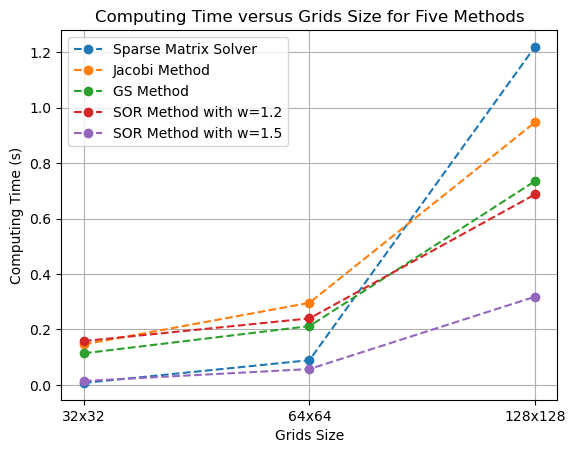

In [184]:
plt.plot(t_SP,'--o',label='Sparse Matrix Solver')
plt.plot(t_J,'--o',label='Jacobi Method')
plt.plot(t_GS,'--o',label='GS Method')
plt.plot(t_SOR_12,'--o',label='SOR Method with w=1.2')
plt.plot(t_SOR_15,'--o',label='SOR Method with w=1.5')
plt.xlabel('Grids Size')
plt.ylabel('Computing Time (s)')
plt.title('Computing Time versus Grids Size for Five Methods')
plt.grid()
plt.legend()
plt.xticks([0,1,2],['32x32','64x64','128x128']);
plt.savefig('P4.png')